In [307]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

In [228]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [229]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


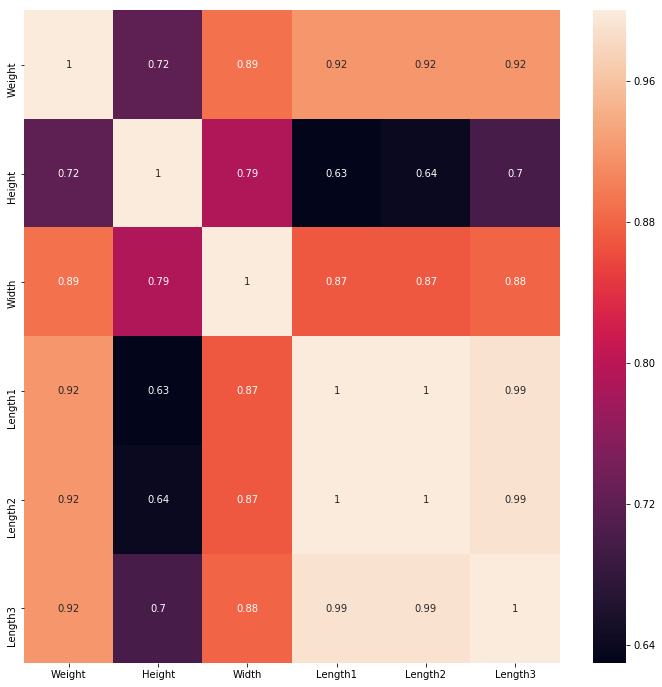

In [299]:
correlation_matrix = df[['Weight','Height','Width','Length1','Length2','Length3']].corr().round(2)

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

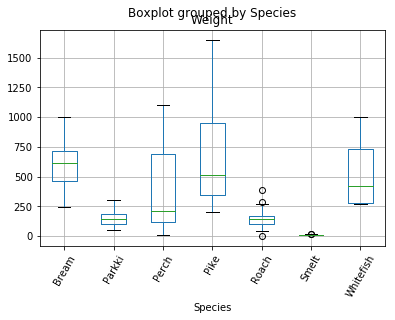

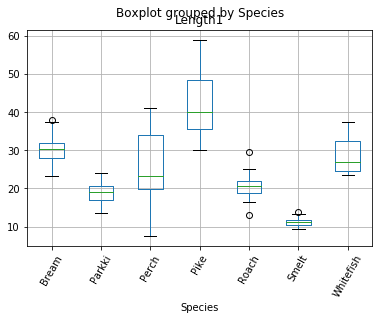

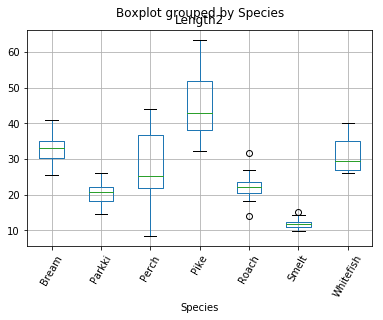

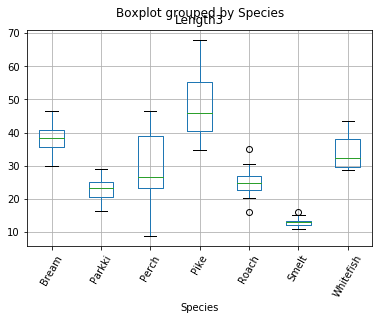

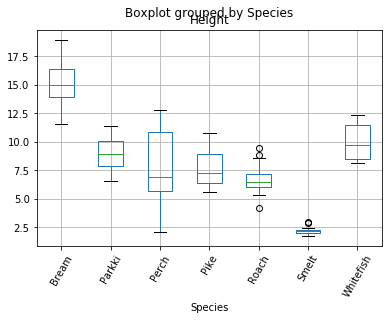

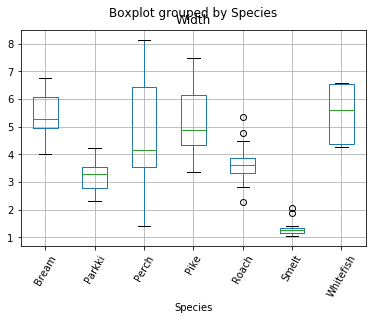

In [333]:
df.boxplot('Weight', 'Species', rot=60)

df.boxplot('Length1', 'Species', rot=60)

df.boxplot('Length2', 'Species', rot=60)

df.boxplot('Length3', 'Species', rot=60)

df.boxplot('Height', 'Species', rot=60)

df.boxplot('Width', 'Species', rot=60)

plt.show()


Weight


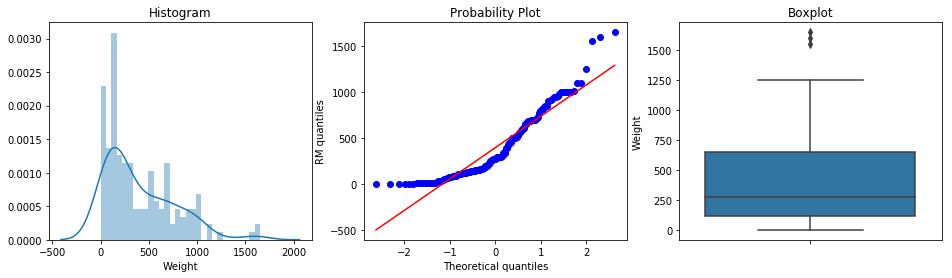

Height


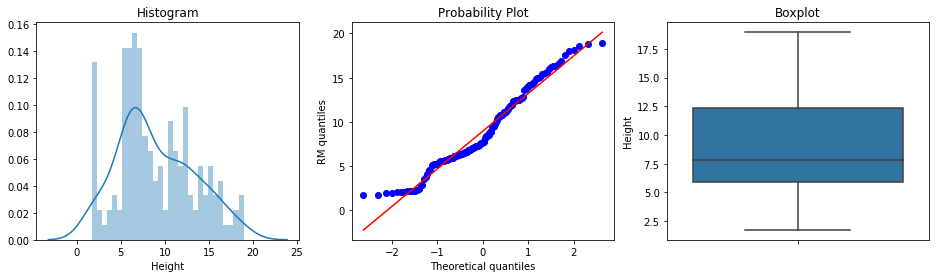

Width


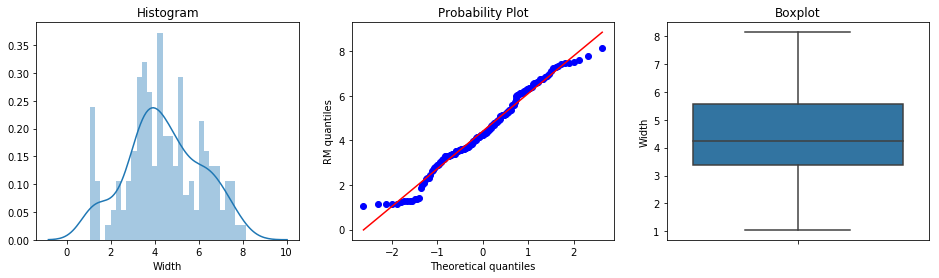

Length


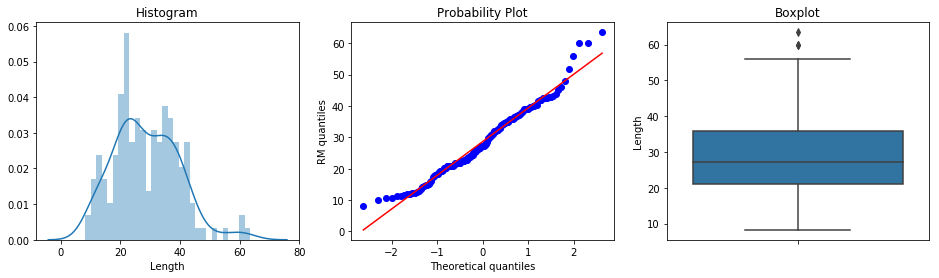

In [327]:
for i in list(df_1.columns):
    print(i)
    diagnostic_plots(df_1, i)

In [317]:
df.groupby('Species').count()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,35,35,35,35,35,35
Parkki,11,11,11,11,11,11
Perch,56,56,56,56,56,56
Pike,17,17,17,17,17,17
Roach,20,20,20,20,20,20
Smelt,14,14,14,14,14,14
Whitefish,6,6,6,6,6,6


In [295]:
for i in list(df['Species'].unique()):
    exec("df_"+ i + " =" + "df[df['Species']==i][['Weight','Height','Width']]")
    exec("df_"+ i + "['Length']" + " =" + "df[df['Species']==i][['Length1','Length2','Length3']].mean(axis=1)")

Bream


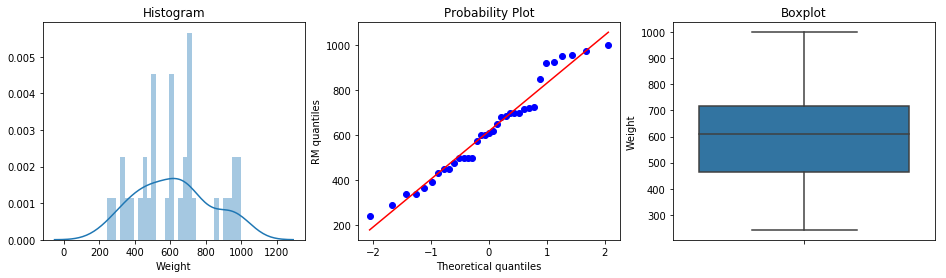

Roach


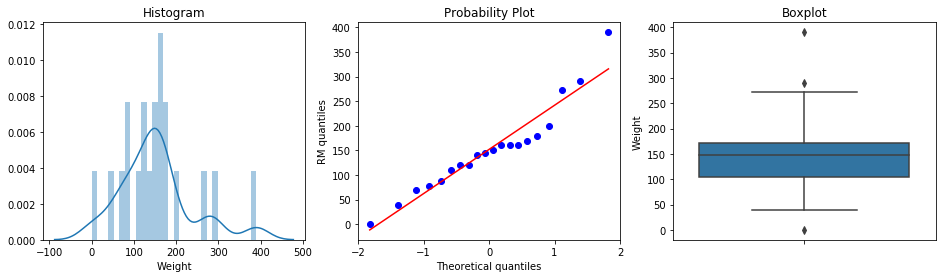

Whitefish


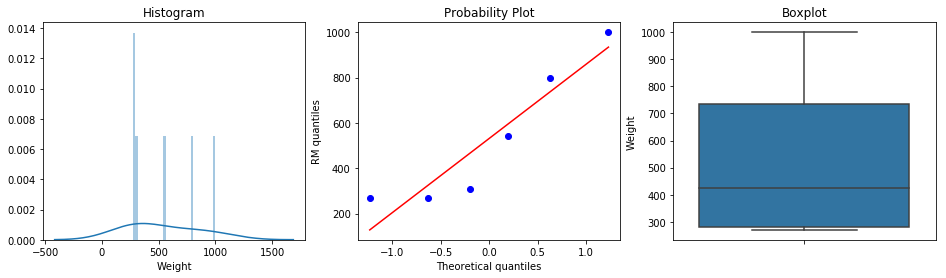

Parkki


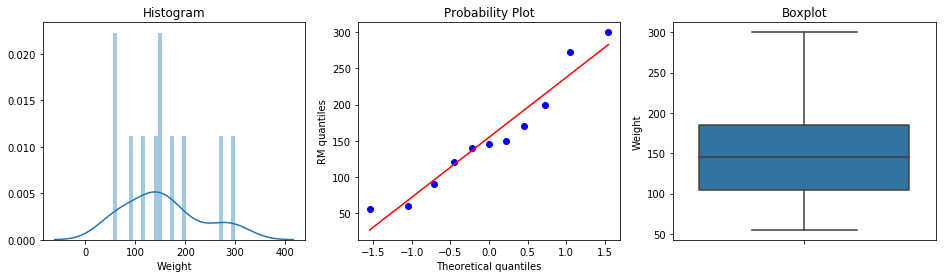

Perch


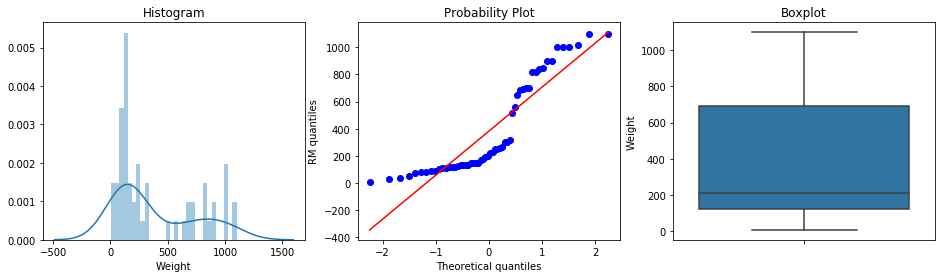

Pike


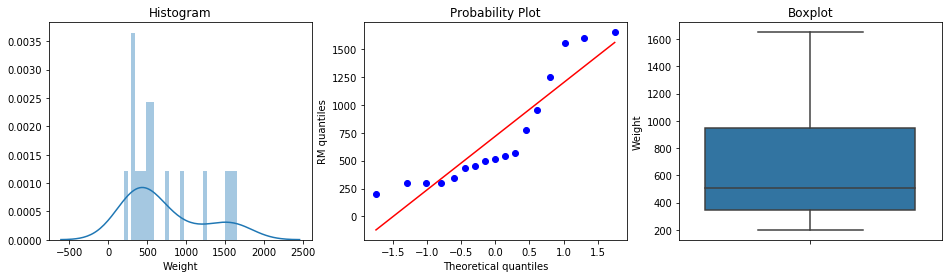

Smelt


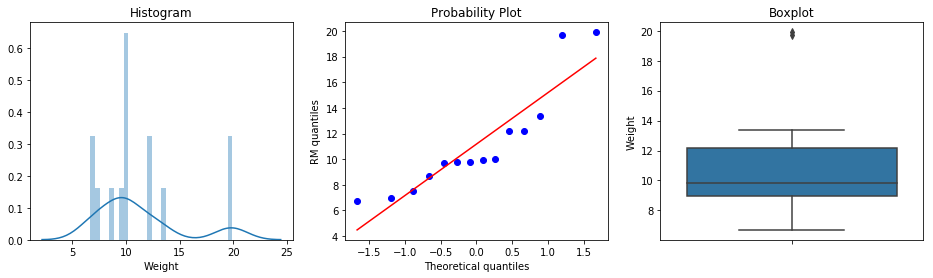

In [324]:
for i in list(df['Species'].unique()):
    print(i)
    exec("diagnostic_plots("+"df_"+ i +", 'Weight')")

In [441]:
df_model =df[['Species','Weight','Height','Width']]
df_model['Length'] = df[['Length1','Length2','Length3']].mean(axis=1)

df_model['Species'] = df_model['Species'].astype('category') 
df_model = pd.get_dummies(df_model,drop_first=True)
df_model.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Weight,Height,Width,Length,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,11.5200,4.0200,26.200000,0,0,0,0,0,0
1,290.0,12.4800,4.3056,27.166667,0,0,0,0,0,0
2,340.0,12.3778,4.6961,27.166667,0,0,0,0,0,0
3,363.0,12.7300,4.4555,29.600000,0,0,0,0,0,0
4,430.0,12.4440,5.1340,29.833333,0,0,0,0,0,0


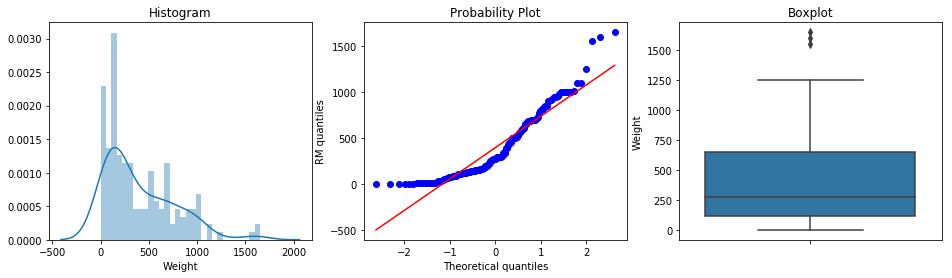

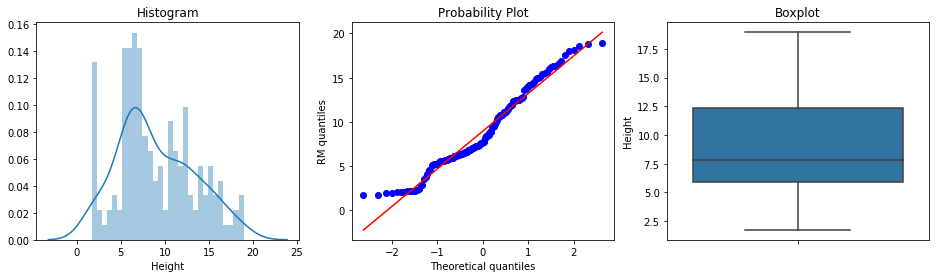

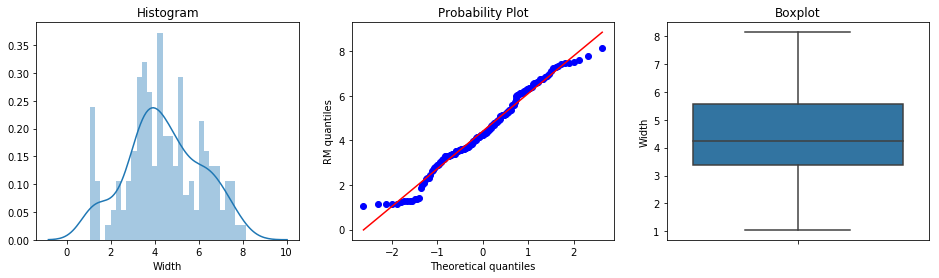

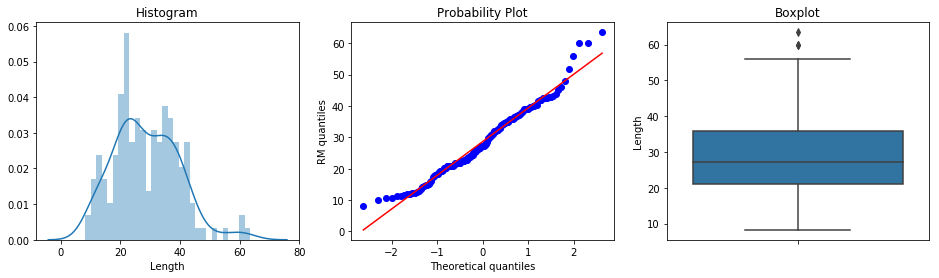

In [442]:
for i in ['Weight', 'Height', 'Width', 'Length']:

    diagnostic_plots(df_model, i)

In [443]:
df_model['Weight'].sort_values()

40        0.0
72        5.9
145       6.7
147       7.0
146       7.5
        ...  
125    1100.0
141    1250.0
143    1550.0
142    1600.0
144    1650.0
Name: Weight, Length: 159, dtype: float64

In [444]:
df_model.drop(40,axis=0,inplace=True)

In [445]:
df_model['Weight'] = np.log(df_model['Weight'])

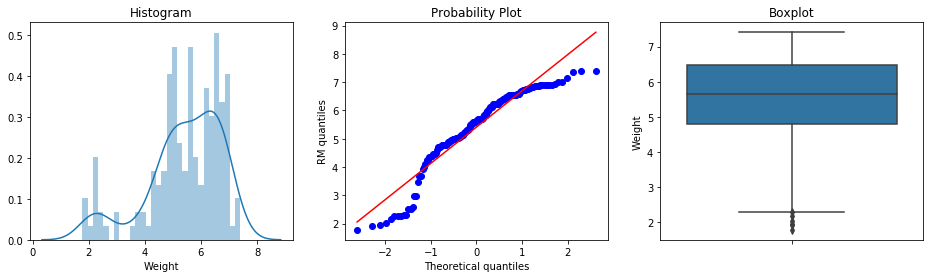

In [446]:
diagnostic_plots(df_model, 'Weight')

In [447]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_model[['Weight', 'Height', 'Width', 'Length']].values)
df_model[['Weight', 'Height', 'Width', 'Length']] = scaler.transform(df_model[['Weight', 'Height', 'Width', 'Length']].values)
df_model.head()



,Weight,Height,Width,Length,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.059720,0.591654,-0.240092,-0.230924,0,0,0,0,0,0
1,0.196595,0.815870,-0.070461,-0.140904,0,0,0,0,0,0
2,0.316919,0.792000,0.161475,-0.140904,0,0,0,0,0,0
3,0.366434,0.874260,0.018572,0.085698,0,0,0,0,0,0
4,0.494564,0.807462,0.421564,0.107427,0,0,0,0,0,0


In [448]:
X = df_model.drop('Weight',axis=1).values
y = df_model['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9826243033833103
Root Mean Squared Error: 0.14127361891004425


In [473]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg_all,X,y,cv=3)

print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))



[0.60893 0.71259 0.49353]
Average 5-Fold CV Score: 0.6050140001351161


In [462]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

l1_space = np.linspace(0, 0.4, 100)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=3)

gm_cv.fit(X_train,y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8488592989126175
Tuned ElasticNet MSE: 0.17360464776512


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [463]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gm_cv,X,y,cv=3)

print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

[0.89852 0.81655 0.64421]
Average 5-Fold CV Score: 0.7864237677574155


In [481]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [488]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

alpha = np.linspace(0, 10, 10000)
param_grid = {'alpha': alpha}

ridge = Ridge()

gr_cv = GridSearchCV(ridge, param_grid, cv=3)

gr_cv.fit(X_train,y_train)

y_pred = gr_cv.predict(X_test)
r2 = gr_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Ridge Alpha: {}".format(gr_cv.best_params_))
print("Ridge R squared: {}".format(r2))
print("Ridge MSE: {}".format(mse))



Ridge Alpha: {'alpha': 0.369036903690369}
Ridge R squared: 0.9812472781391229
Ridge MSE: 0.0215399270340331


In [489]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gr_cv,X,y,cv=3)

print(cv_scores)

print("Average 3-Fold CV Score: {}".format(np.mean(cv_scores)))


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.846125105390608e-19 / 1.1102230246251565e-16
  


[0.90679 0.75964 0.86298]
Average 5-Fold CV Score: 0.843137189554264


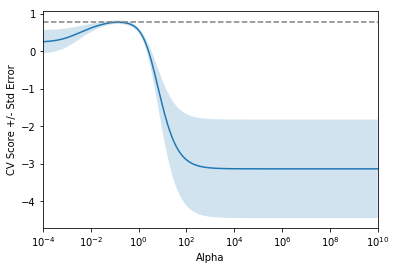

In [482]:
alpha_space = np.logspace(-4, 10, 500)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize=True)

for alpha in alpha_space:

    ridge.alpha = alpha
    
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)



In [490]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

alpha = np.linspace(0, 1, 10000)
param_grid = {'alpha': alpha}

lasso = Lasso()

gl_cv = GridSearchCV(lasso, param_grid, cv=3)

gl_cv.fit(X_train,y_train)

y_pred = gl_cv.predict(X_test)
r2 = gl_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Lasso Alpha: {}".format(gl_cv.best_params_))
print("Lasso R squared: {}".format(r2))
print("Lasso MSE: {}".format(mse))




/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/pyt

Lasso Alpha: {'alpha': 0.0014001400140014}
Lasso R squared: 0.9817768473243335
Lasso MSE: 0.02093164831622706


In [492]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gl_cv,X,y,cv=3)

print(cv_scores)

print("Average 3-Fold CV Score: {}".format(np.mean(cv_scores)))



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/pyt

[0.92583 0.84629 0.85997]
Average 3-Fold CV Score: 0.8773628555942637


In [503]:
# in this cell, I want to introduce the use of yellobricks
# a library for visualisation of machine learning model 
# outcomes

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

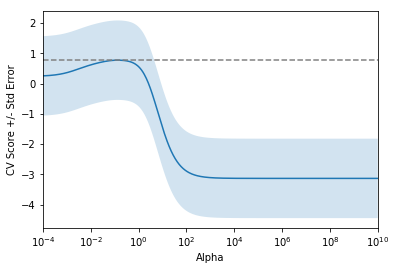

In [486]:
alpha_space = np.logspace(-4, 10, 500)
lasso_scores = []
lasso_scores_std = []
lasso = Ridge(normalize=True)

for alpha in alpha_space:

    lasso.alpha = alpha
    
    lasso_cv_scores = cross_val_score(lasso, X, y, cv=5)
    
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    lasso_scores_std.append(np.std(ridge_cv_scores))

display_plot(lasso_scores, lasso_scores_std)


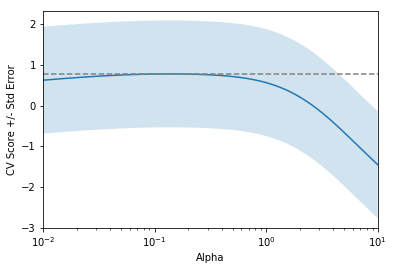

In [484]:
alpha_space = np.logspace(-2, 1, 500)
lasso_scores = []
lasso_scores_std = []
lasso = Ridge(normalize=True)

for alpha in alpha_space:

    lasso.alpha = alpha
    
    lasso_cv_scores = cross_val_score(lasso, X, y, cv=5)
    
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    lasso_scores_std.append(np.std(ridge_cv_scores))

display_plot(lasso_scores, lasso_scores_std)



In [ ]:
 Since Lasso with

In [248]:
df.groupby('Species')['Species'].count()

Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
Name: Species, dtype: int64

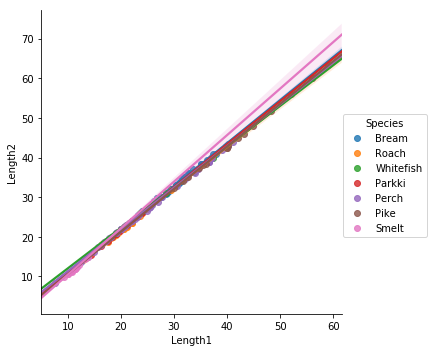

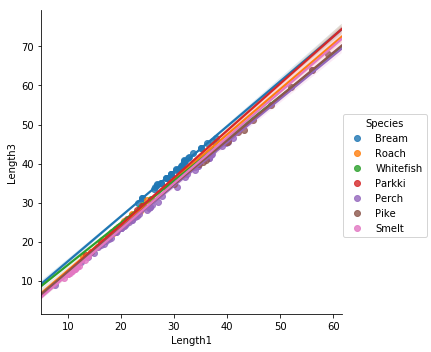

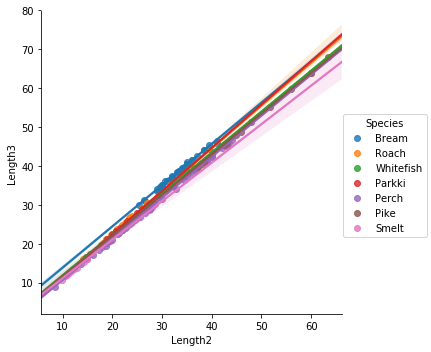

In [239]:
sns.lmplot(x='Length1',y='Length2',data=df,hue='Species',legend=True)
sns.lmplot(x='Length1',y='Length3',data=df,hue='Species',legend=True)
sns.lmplot(x='Length2',y='Length3',data=df,hue='Species',legend=True)

In [298]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [302]:
df_1 = df[['Weight','Height','Width']]
df_1['Length'] = df[['Length1','Length2','Length3']].mean(axis=1)
df_1.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Weight,Height,Width,Length
0,242.0,11.5200,4.0200,26.200000
1,290.0,12.4800,4.3056,27.166667
2,340.0,12.3778,4.6961,27.166667
3,363.0,12.7300,4.4555,29.600000
4,430.0,12.4440,5.1340,29.833333


In [326]:
list(df_1.columns):

['Weight', 'Height', 'Width', 'Length']

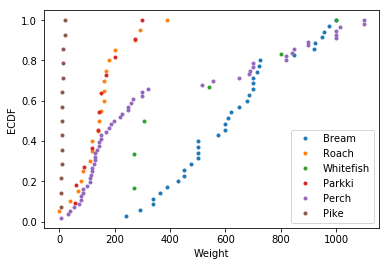

In [329]:
#------------------ Weight -------------------------
Weight_Bream = df[df['Species'] == 'Bream']['Weight']
Weight_Roach = df[df['Species'] == 'Roach']['Weight']
Weight_Whitefish = df[df['Species'] == 'Whitefish']['Weight']
Weight_Parkki = df[df['Species'] == 'Parkki']['Weight']
Weight_Perch = df[df['Species'] == 'Perch']['Weight']
Weight_Pike = df[df['Species'] == 'Pike']['Weight']
Weight_Smelt = df[df['Species'] == 'Smelt']['Weight']

#------------------ Length -------------------------
Length_Bream = df[df['Species'] == 'Bream'][['Length1','Length2','Length3']].mean(axis=1)
Length_Roach = df[df['Species'] == 'Roach'][['Length1','Length2','Length3']].mean(axis=1)
Length_Whitefish = df[df['Species'] == 'Whitefish'][['Length1','Length2','Length3']].mean(axis=1)
Length_Parkki = df[df['Species'] == 'Parkki'][['Length1','Length2','Length3']].mean(axis=1)
Length_Perch = df[df['Species'] == 'Perch'][['Length1','Length2','Length3']].mean(axis=1)
Length_Pike = df[df['Species'] == 'Pike'][['Length1','Length2','Length3']].mean(axis=1)
Length_Smelt = df[df['Species'] == 'Smelt'][['Length1','Length2','Length3']].mean(axis=1)

#------------------ Height -------------------------
Height_Bream = df[df['Species'] == 'Bream']['Height']
Height_Roach = df[df['Species'] == 'Roach']['Height']
Height_Whitefish = df[df['Species'] == 'Whitefish']['Height']
Height_Parkki = df[df['Species'] == 'Parkki']['Height']
Height_Perch = df[df['Species'] == 'Perch']['Height']
Height_Pike = df[df['Species'] == 'Pike']['Height']
Height_Smelt = df[df['Species'] == 'Smelt']['Height']

#------------------ Width -------------------------
Width_Bream = df[df['Species'] == 'Bream']['Width']
Width_Roach = df[df['Species'] == 'Roach']['Width']
Width_Whitefish = df[df['Species'] == 'Whitefish']['Width']
Width_Parkki = df[df['Species'] == 'Parkki']['Width']
Width_Perch = df[df['Species'] == 'Perch']['Width']
Width_Pike = df[df['Species'] == 'Pike']['Width']
Width_Smelt = df[df['Species'] == 'Smelt']['Width']

# Compute ECDFs
x_w_bream, y_w_bream  = ecdf(Weight_Bream)
x_w_roach, y_w_roach = ecdf(Weight_Roach) 
x_w_whitefish, y_w_whitefish = ecdf(Weight_Whitefish) 
x_w_Parkki, y_w_Parkki = ecdf(Weight_Parkki) 
x_w_Perch, y_w_Perch = ecdf(Weight_Perch) 
x_w_Pike, y_w_Pike = ecdf(Weight_Pike) 
x_w_Smelt, y_w_Smelt = ecdf(Weight_Smelt) 

# Plot all ECDFs on the same plot
plot = plt.plot(x_w_bream, y_w_bream, marker = '.', linestyle='none')
plot = plt.plot(x_w_roach, y_w_roach , marker = '.', linestyle='none' )
plot = plt.plot(x_w_whitefish, y_w_whitefish, marker = '.', linestyle='none')
plot = plt.plot(x_w_Parkki, y_w_Parkki, marker = '.', linestyle='none')
plot = plt.plot(x_w_Perch, y_w_Perch, marker = '.', linestyle='none')
plot = plt.plot(x_w_Smelt, y_w_Smelt, marker = '.', linestyle='none')

# Annotate the plot
plt.legend(('Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'), loc='lower right')
plot = plt.xlabel('Weight')
plot = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Length1 & Weight 

In [ ]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="Length1", y="Weight", data=df, order=1, legend=True)

sns.lmplot(x="Length1", y="Weight", data=df, hue='Species', order=1, legend=True)

plt.title('All Species')
plt.ylabel('Weight')
plt.xlabel('Length1')

In [ ]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="Length1", y="Weight", data=df[df['Species'].isin(['Roach', 'Parkki'])], order=1, hue='Species', legend=True)

sns.lmplot(x="Length1", y="Weight", data=df[df['Species']=='Smelt'], order=1, hue='Species', legend=True)

plt.ylabel('Weight')
plt.xlabel('Length1')

In [ ]:
sns.lmplot(x="Length1", y="Weight", data=df[df['Species']=='Smelt'], order=1, legend=True)

sns.lmplot(x="Length1", y="Weight", data=df[df['Species']=='Smelt'], order=2,  legend=True)


plt.ylabel('Weight')
plt.xlabel('Length1')

Text(0.5,20.8,'Length1')

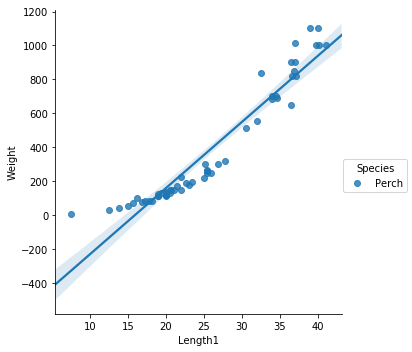

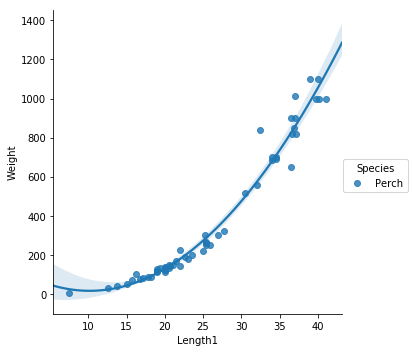

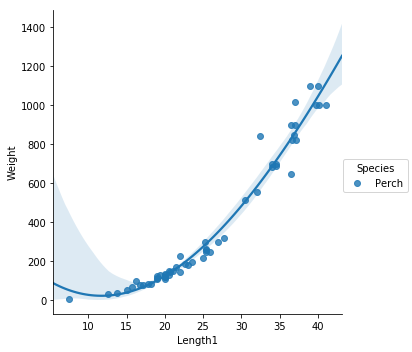

In [149]:
sns.lmplot(x="Length1", y="Weight", data=df[df['Species']=='Perch'], order=1, hue='Species', legend=True)
sns.lmplot(x="Length1", y="Weight", data=df[df['Species']=='Perch'], order=2, hue='Species', legend=True)
sns.lmplot(x="Length1", y="Weight", data=df[df['Species']=='Perch'], order=3, hue='Species', legend=True)

plt.ylabel('Weight')
plt.xlabel('Length1')

Text(0.5,20.8,'Length1')

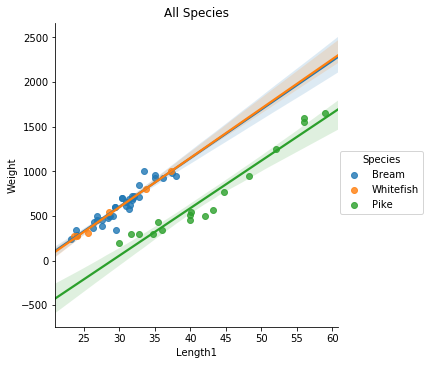

In [143]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="Length1", y="Weight", data=df[~df['Species'].isin(['Perch','Roach', 'Smelt', 'Parkki'])], order=1, hue='Species', legend=True)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.title('All Species')
plt.ylabel('Weight')
plt.xlabel('Length1')

## Height & Weight

Text(0.5,20.8,'Height')

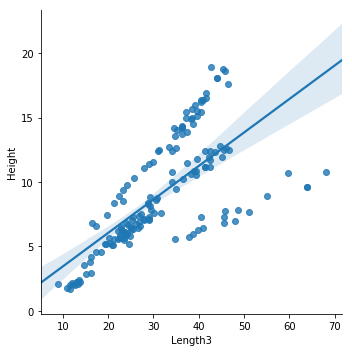

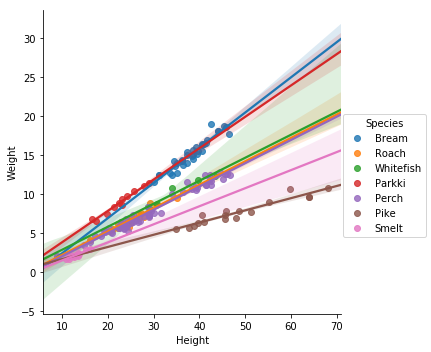

In [152]:
sns.lmplot(x="Length3", y="Height", data=df, order=1)

sns.lmplot(x="Length3", y="Height", data=df, hue='Species', order=1)

plt.ylabel('Weight')
plt.xlabel('Height')

Text(0.5,20.8,'Height')

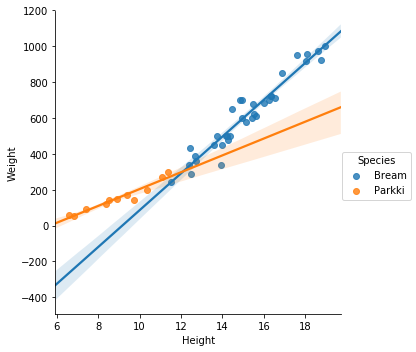

In [155]:

sns.lmplot(x="Height", y="Weight", data=df[df['Species'].isin([ 'Parkki', 'Bream'])], order=1, hue='Species', legend=True)


plt.ylabel('Weight')
plt.xlabel('Height')

Text(0.5,6.8,'Height')

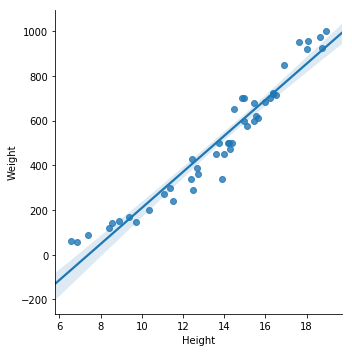

In [336]:

sns.lmplot(x="Height", y="Weight", data=df[df['Species'].isin([ 'Parkki', 'Bream'])], order=1, legend=True)


plt.ylabel('Weight')
plt.xlabel('Height')

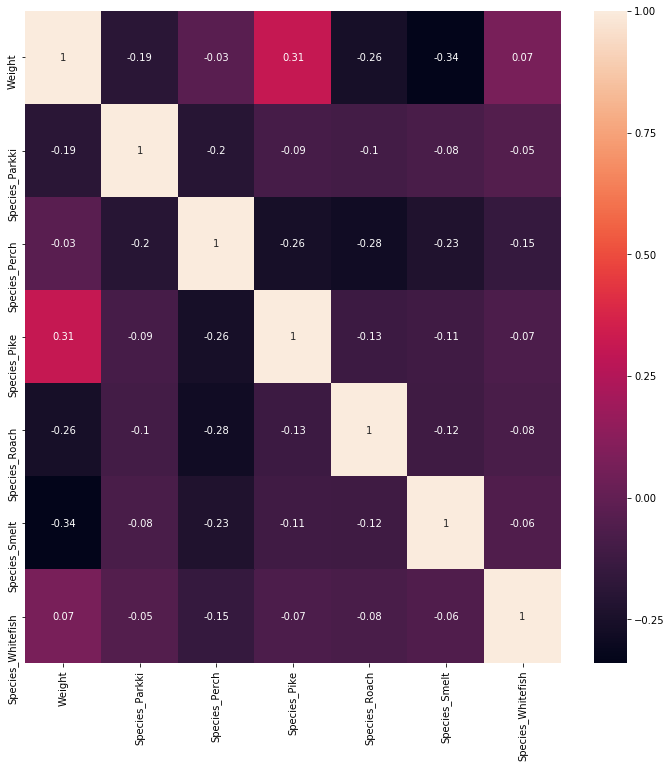

In [88]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = df[['Weight','Species_Parkki', 'Species_Perch', 'Species_Pike',
             'Species_Roach', 'Species_Smelt', 'Species_Whitefish']].corr().round(2)



# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

In [170]:

df = pd.read_csv('Fish.csv')
df = pd.get_dummies(df,drop_first=True)
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [184]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('Weight',axis=1).values
y = df['Weight'].values.reshape(-1,1)

reg_all = LinearRegression()

reg_all.fit(X,y)
y_pred = reg_all.predict(X)

print("R^2: {}".format(reg_all.score(X, y)))
rmse = np.sqrt(mean_squared_error(y_pred,y))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9360849020585846
Root Mean Squared Error: 90.21701053757442


In [195]:
reg_all.coef_

array([[ -80.30295196,   79.88863137,   32.53538142,    5.25098766,
          -0.51543798,  164.72266067,  137.94890963, -208.42935662,
         103.03995457,  446.07331747,   93.87416805]])

In [196]:
reg_all.intercept_

array([-918.3321402])

In [194]:
y

array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 450. ],
       [ 500. ],
       [ 390. ],
       [ 450. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 340. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 575. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 714. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 950. ],
       [  40. ],
       [  69. ],
       [  78. ],
       [  87. ],
       [ 120. ],
       [   0. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 145. ],
       [ 160. ],
       [ 140. ],
       [ 160. ],
       [ 169. ],
       [ 161. ],
       [ 200. ],
       [ 180. ],
       [ 290. ],
       [ 272. ],
       [ 390. ],
       [ 270. ],
       [ 270. ],
       [ 306. ],
       [ 540. 

In [193]:
y_pred

array([[ 2.82291371e+02],
       [ 3.33884974e+02],
       [ 3.53901528e+02],
       [ 4.40954349e+02],
       [ 4.39309943e+02],
       [ 5.00105100e+02],
       [ 4.96447398e+02],
       [ 4.64816286e+02],
       [ 4.75000093e+02],
       [ 4.95542957e+02],
       [ 5.27655292e+02],
       [ 5.04283935e+02],
       [ 5.15629686e+02],
       [ 5.53178460e+02],
       [ 5.63373608e+02],
       [ 5.65702068e+02],
       [ 5.98195545e+02],
       [ 6.05155405e+02],
       [ 6.11884052e+02],
       [ 6.00714283e+02],
       [ 6.46115331e+02],
       [ 6.32969674e+02],
       [ 6.78725240e+02],
       [ 7.23138055e+02],
       [ 7.16186620e+02],
       [ 7.37619294e+02],
       [ 7.11788573e+02],
       [ 7.65684867e+02],
       [ 7.62685822e+02],
       [ 8.29545114e+02],
       [ 8.73048202e+02],
       [ 8.70049356e+02],
       [ 8.99153737e+02],
       [ 9.41521790e+02],
       [ 9.07741991e+02],
       [-1.77089502e+02],
       [ 5.17337283e-01],
       [-1.15712042e+00],
       [ 5.5

In [177]:
np.square(y_pred - y) 

array([[1.62339456e+03],
       [1.92589096e+03],
       [1.93252483e+02],
       [6.07688060e+03],
       [8.66750313e+01],
       [2.51052100e+03],
       [1.26209811e+01],
       [5.59747664e+03],
       [6.25004656e+02],
       [1.98652305e+01],
       [2.77257979e+03],
       [1.83520962e+01],
       [2.44287078e+02],
       [4.54450558e+04],
       [1.34149260e+03],
       [1.17634812e+03],
       [1.03641471e+04],
       [8.99549725e+03],
       [3.54965345e+00],
       [2.42908186e+03],
       [5.05739030e+03],
       [2.70715477e+03],
       [3.44865377e+03],
       [1.86089175e+03],
       [2.62006661e+02],
       [1.59246589e+02],
       [6.74275311e+01],
       [2.67132544e+03],
       [7.62376565e+03],
       [2.90548681e+04],
       [2.20447132e+03],
       [7.21661186e+03],
       [6.68029302e+02],
       [1.12079052e+03],
       [1.78573935e+03],
       [4.71278519e+04],
       [4.68987509e+03],
       [6.26584971e+03],
       [1.01564303e+03],
       [6.09510234e+03],


In [189]:
np.sum(np.square(y_pred - y))/(2*len(y))

4069.554495168407

In [192]:
np.sqrt(np.sum(np.square(y_pred - y))/(2*len(y)))

63.79305992949709

In [363]:
df_model.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [181]:
np.sqrt(np.sum(np.square(y_pred - y)))/len(y)

7.154674326557391

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('Weight',axis=1).values
y = df['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9379921317795368
Root Mean Squared Error: 87.15263646317105


In [216]:
reg_all = LinearRegression()
cvscores_3 = cross_val_score(reg_all,X,y,cv=5)
print(np.mean(cvscores_3))
cvscores_3
# Perform 3-fold CV


-1.9025719090978428


array([  0.30866139,   0.27747547, -11.11448601,   0.87255345,
         0.14293616])

In [32]:
cvscores_10 = cross_val_score(reg_all,X,y,cv=10)
print(np.mean(cvscores_10))
cvscores_10

-1.3480143909855484


array([-0.36853475,  0.27541171,  0.85189585,  0.43098694, -8.29758937,
       -6.44287934,  0.48137491,  0.62803912, -1.00249621, -0.03635276])

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9379921317795368
Root Mean Squared Error: 87.15263646317105


In [37]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

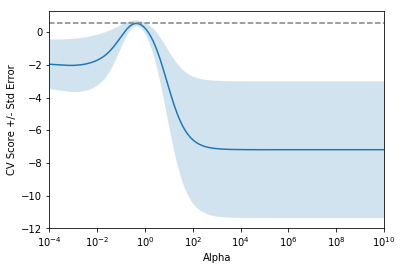

In [45]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 10, 500)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)



# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)



In [44]:
ridge = Ridge(normalize=True)
ridge.alpha = 0.1
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9348937522005506
Root Mean Squared Error: 89.3034963625803


In [46]:
ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
ridge_cv_scores

array([-1.58216020e+00, -2.08886222e-01, -3.35983495e+01, -5.64312468e-01,
       -4.46876182e-06])

In [48]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 100)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.9350585074170215
Tuned ElasticNet MSE: 7953.642426888278


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [337]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

Index(['Weight', 'Height', 'Width', 'Length'], dtype='object')

In [342]:
X = df_Bream[['Height', 'Width', 'Length']].values
y = df_Bream['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_Bream = LinearRegression()

reg_Bream.fit(X_train,y_train)

y_pred = reg_Bream.predict(X_test)

print("R^2: {}".format(reg_Bream.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8277834434614363
Root Mean Squared Error: 69.52762239923747


In [502]:
X = df_Whitefish[['Height', 'Width', 'Length']].values
y = df_Whitefish['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg_Whitefish = LinearRegression()

reg_Whitefish.fit(X_train,y_train)

y_pred = reg_Whitefish.predict(X_test)

print("R^2: {}".format(reg_Whitefish.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9773941841139476
Root Mean Squared Error: 37.13701955451152


In [352]:
y_test

array([[1000.],
       [ 306.]])

In [353]:
y_pred

array([[972.18092522],
       [353.75032827]])

In [494]:
X = df_Roach[['Height', 'Width', 'Length']].values
y = df_Roach['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

reg_Roach = LinearRegression()

reg_Roach.fit(X_train,y_train)

y_pred = reg_Roach.predict(X_test)

print("R^2: {}".format(reg_Roach.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9312518622786307
Root Mean Squared Error: 24.699460226034542


In [361]:
X = df_Parkki[['Height', 'Width', 'Length']].values
y = df_Parkki['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_Parkki = LinearRegression()

reg_Parkki.fit(X_train,y_train)

y_pred = reg_Parkki.predict(X_test)

print("R^2: {}".format(reg_Parkki.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9046859079855151
Root Mean Squared Error: 30.756214107034605


In [362]:
X = df_Perch[['Height', 'Width', 'Length']].values
y = df_Perch['Weight'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_Perch = LinearRegression()

reg_Perch.fit(X_train,y_train)

y_pred = reg_Perch.predict(X_test)

print("R^2: {}".format(reg_Perch.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.886747441276448
Root Mean Squared Error: 101.11053748340292


In [364]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [509]:
(df.to_string,2

<bound method DataFrame.to_string of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>